<a href="https://colab.research.google.com/github/aadmberrada/WalmartSales/blob/main/DTS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 - Import

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', 100)
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PATH = "/content/drive/MyDrive/DTS/walmart-recruiting-store-sales-forecasting"

train = pd.read_csv(PATH+ "/train.csv")
features = pd.read_csv(PATH+ "/features.csv")
stores = pd.read_csv(PATH+ "/stores.csv")
ss = pd.read_csv(PATH+ "/sampleSubmission.csv")

# 1 - Présentation des jeux de données

In [3]:
train = train.drop("IsHoliday", axis = 1)
train.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df = pd.merge(left = train, right = features ,on = ['Date', "Store"], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [7]:
#df.to_csv(PATH + '/bdd_merged.csv')

# 3 - Exploration du jeu de données (Analyse descriptive, statistiques descriptives, visualisation)

Voir Dashboards

# 4 - Features Engineering

Création de plusieurs variables

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df['year'] = df["Date"].dt.year
df['month'] = df["Date"].dt.month
df['day'] = df["Date"].dt.day
df['week'] = df["Date"].dt.week

In [9]:
# Création lags (days)
# Lag 
for lag in list(range(4, 25, 4)):
    df['Weekly_Sales_'+str(lag)] = df.groupby(
        ['Store',	'Dept'], 
        as_index = False)['Weekly_Sales'].shift(lag).astype(np.float64)
#df = df.drop("Weekly_Sales_0", axis = 1)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,year,month,day,week,Weekly_Sales_4,Weekly_Sales_8,Weekly_Sales_12,Weekly_Sales_16,Weekly_Sales_20,Weekly_Sales_24
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,...,2010,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,...,2010,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,...,2010,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,...,2010,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,...,2010,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN


Création de variables

In [10]:
df['Store_sales_avg'] = df.groupby('Store')['Weekly_Sales'].transform('mean').astype(np.float64)
df['Dept_sales_avg'] = df.groupby('Dept')['Weekly_Sales'].transform('mean').astype(np.float64)
df['Store_Dept_sales_avg'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform('mean').astype(np.float64)

df = df.replace(np.inf, np.nan)

Creéation de variables

In [11]:
df['Super_Bowl']   =  np.where(((df['Date'] == "2010-02-10") | (df['Date'] == "2011-02-11") | 
                                (df['Date'] == "2012-02-10") | (df['Date'] == "2013-02-08")), 1, 0)

df['Labor_day']    =  np.where(((df['Date'] == "2010-09-10") | (df['Date'] == "2011-09-09") | 
                                (df['Date'] == "2012-09-07") | (df['Date'] == "2013-09-06")), 1, 0)

df['Thanksgiving'] =  np.where(((df['Date'] == "2010-11-26") | (df['Date'] == "2011-11-25") | 
                                (df['Date'] == "2012-11-23") | (df['Date'] == "2013-11-29")), 1, 0)

df['Christmas']    =  np.where(((df['Date'] == "2010-12-31") | (df['Date'] == "2011-12-30") | 
                                (df['Date'] == "2012-12-28") | (df['Date'] ==  "2013-12-27")),1, 0)

In [12]:
df["Benefice"] = np.where(df["Weekly_Sales"]>0, 1, 0)

df["Benefice"].value_counts()

1    420212
0      1358
Name: Benefice, dtype: int64

1358 sans avoir de bénéfice

# 5 -Data Cleaning

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

MarkDown2               0.736110
MarkDown4               0.679847
MarkDown3               0.674808
MarkDown1               0.642572
MarkDown5               0.640790
Weekly_Sales_24         0.179795
Weekly_Sales_20         0.150623
Weekly_Sales_16         0.121237
Weekly_Sales_12         0.091598
Weekly_Sales_8          0.061594
Weekly_Sales_4          0.031155
Store_Dept_sales_avg    0.000000
Dept_sales_avg          0.000000
Store_sales_avg         0.000000
Super_Bowl              0.000000
Labor_day               0.000000
Thanksgiving            0.000000
Christmas               0.000000
Store                   0.000000
day                     0.000000
week                    0.000000
Dept                    0.000000
month                   0.000000
year                    0.000000
IsHoliday               0.000000
Unemployment            0.000000
CPI                     0.000000
Fuel_Price              0.000000
Temperature             0.000000
Weekly_Sales            0.000000
Date      

On va supprimer les colonnes avec plus de 60% de NaN

In [14]:
df.columns[df.isna().sum()/df.shape[0]>0.6]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

In [15]:
to_del = list(df.columns[df.isna().sum()/df.shape[0]>0.6])
df = df.drop(to_del, axis = 1)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,year,...,Weekly_Sales_20,Weekly_Sales_24,Store_sales_avg,Dept_sales_avg,Store_Dept_sales_avg,Super_Bowl,Labor_day,Thanksgiving,Christmas,Benefice
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,2010,...,NaN,NaN,21710.543621,19213.485088,22513.322937,0,0,0,0,1
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False,2010,...,NaN,NaN,21710.543621,43607.020113,46102.090420,0,0,0,0,1
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,2010,...,NaN,NaN,21710.543621,11793.698516,13150.478042,0,0,0,0,1
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False,2010,...,NaN,NaN,21710.543621,25974.630238,36964.154476,0,0,0,0,1
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False,2010,...,NaN,NaN,21710.543621,21365.583515,24257.941119,0,0,0,0,1


In [16]:
(df.isna().sum()).sort_values(ascending = False)

Weekly_Sales_24         75796
Weekly_Sales_20         63498
Weekly_Sales_16         51110
Weekly_Sales_12         38615
Weekly_Sales_8          25966
Weekly_Sales_4          13134
Christmas                   0
Thanksgiving                0
Labor_day                   0
Super_Bowl                  0
Store_Dept_sales_avg        0
Dept_sales_avg              0
Store_sales_avg             0
Store                       0
Dept                        0
week                        0
day                         0
month                       0
year                        0
IsHoliday                   0
Unemployment                0
CPI                         0
Fuel_Price                  0
Temperature                 0
Weekly_Sales                0
Date                        0
Benefice                    0
dtype: int64

Pour les NaN, on utilise la méthode du Backward fill : on remplace les valeurs
manquantes dans le passé en se basant sur la première valeur connue après les manquantes. On l'utilise car les variables avec les NaN sont des Variables laguées.

In [17]:
for col in df.columns :
  if col.startswith("Weekly_Sales_"):
    df[col]  = df[col].bfill(axis ='rows')

In [18]:
df.isna().sum()

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
Temperature             0
Fuel_Price              0
CPI                     0
Unemployment            0
IsHoliday               0
year                    0
month                   0
day                     0
week                    0
Weekly_Sales_4          0
Weekly_Sales_8          0
Weekly_Sales_12         0
Weekly_Sales_16         0
Weekly_Sales_20         0
Weekly_Sales_24         0
Store_sales_avg         0
Dept_sales_avg          0
Store_Dept_sales_avg    0
Super_Bowl              0
Labor_day               0
Thanksgiving            0
Christmas               0
Benefice                0
dtype: int64

In [19]:
df = df.set_index(df["Date"])
df = df.drop(["Date","IsHoliday"], axis = 1)

In [20]:
df.shape

(421570, 25)

# 6 - Préparation des données

# 7 - Sélection de différents modèles (explications des critères de sélection, choix de la métrique, …)

### 7 - 0 - Fn

In [21]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
import re
import time

#stores = df.Store.unique()

In [22]:
#df = df.loc[:'2010-06-30']
#On prend 6 mois
df.shape

(421570, 25)

In [23]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'year', 'month', 'day', 'week', 'Weekly_Sales_4',
       'Weekly_Sales_8', 'Weekly_Sales_12', 'Weekly_Sales_16',
       'Weekly_Sales_20', 'Weekly_Sales_24', 'Store_sales_avg',
       'Dept_sales_avg', 'Store_Dept_sales_avg', 'Super_Bowl', 'Labor_day',
       'Thanksgiving', 'Christmas', 'Benefice'],
      dtype='object')

In [24]:
df[df['year']==2011].index

DatetimeIndex(['2011-01-07', '2011-01-07', '2011-01-07', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-07', '2011-01-07',
               '2011-01-07', '2011-01-07',
               ...
               '2011-12-30', '2011-12-30', '2011-12-30', '2011-12-30',
               '2011-12-30', '2011-12-30', '2011-12-30', '2011-12-30',
               '2011-12-30', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=153453, freq=None)

Pour la taille du train set, on va récupérer les données jusqu'en fin 2011. Donc on prend en compte 2 années pour chaque Store.

Le test set sera l'année 2012

In [25]:
df[df['year']==2012].index

DatetimeIndex(['2012-01-06', '2012-01-06', '2012-01-06', '2012-01-06',
               '2012-01-06', '2012-01-06', '2012-01-06', '2012-01-06',
               '2012-01-06', '2012-01-06',
               ...
               '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26',
               '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26',
               '2012-10-26', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=127438, freq=None)

In [26]:
def model(model):
  importance_df = pd.DataFrame()
  stores = df.Store.unique()

  d_test = pd.DataFrame()
  d_train = pd.DataFrame()
  metrics = {}

  t1 = time.time()
  for store in stores:
    df_ = df[df['Store']==store]
    
    train = df_.loc[:'2011-12-30']
    #train = df_.loc[:'2010-05-31']

    scaler = MinMaxScaler()
    X_train = train.drop("Weekly_Sales", axis = 1)
    X_train_ = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_, columns = X_train.columns)

    y_train = train["Weekly_Sales"]

    # Validation Prediction
    test = df_.loc['2012-01-06':]
    #test = df_.loc['2010-06-01':]

    #test_ = test.copy()
    #X_test__ = test_.drop("Weekly_Sales", axis = 1)

    X_test = test.drop("Weekly_Sales", axis = 1)
    X_test_ = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_, columns = X_test.columns)
    y_test = test["Weekly_Sales"]

    X_test = X_test.set_index(y_test.index)
    y_test = test["Weekly_Sales"]

      # Train and validate
    model = model
    
    """ 
    model =  LGBMRegressor(
            n_estimators=100,
            learning_rate=0.03,
            subsample=0.8,
            colsample_bytree=0.8,
            max_depth=8,
            num_leaves=50,
            min_child_weight=300
        )
    """
    
    # Fit model
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    pred = pd.DataFrame(test_pred)
    pred = pred.set_index(y_test.index)
    predictions_test = pd.concat([y_test, pred], axis = 1)
    predictions_test.columns = ["Weekly_Sales", "y_pred_test"]
    predictions_test["Store"] = store
    #predictions_test["erreur_test"] = predictions_test["Weekly_Sales"] - predictions_test["y_pred_test"]

    test_pred_train = model.predict(X_train)
    pred_train = pd.DataFrame(test_pred_train)
    pred_train = pred_train.set_index(y_train.index)
    predictions_train = pd.concat([y_train, pred_train], axis = 1)
    predictions_train.columns = ["Weekly_Sales", "y_pred_train"]
    predictions_train["Store"] = store
    #predictions_train["erreur_train"] = predictions_train["Weekly_Sales"] - predictions_train["y_pred_train"]

    d_test = pd.concat([d_test, predictions_test], axis = 0)
    d_train = pd.concat([d_train, predictions_train], axis = 0)

  
    importance_df["features"] = [ col for col in X_train.columns if col != "Weekly_Sales"]
    importance_df["importance_"+str(store)] = model.feature_importances_
  
  importance_df["importance"] = np.mean(importance_df[[col for col in importance_df.columns if col!= "features"]], axis = 1)
  importance_df = importance_df[["features", "importance"]]
  t2 = time.time() - t1

  assert d_test.shape[0]  == df[df['year']==2012].shape[0]
  assert d_train.shape[0] == df[df['year']==2010].shape[0] + df[df['year']==2011].shape[0]

  print("Succès !")
  print("L'opération a duré "+str(round(t2, 2))+" sec")
  return model, d_test, d_train, importance_df, t2



In [27]:
def metrics_(predictions_test, predictions_train):

  metrics_dict = {"Store" : [], "RMSE_train" : [], "RMSE_test" : [], "MAE_train" : [], 
                                "MAE_test" : [],"RMSE_PCT_train": [], "RMSE_PCT_test": []}

  for store in predictions_train["Store"].unique():

    m_test = predictions_test[predictions_test["Store"]==store]
    rmse = np.sqrt(mean_squared_error(m_test["Weekly_Sales"], m_test["y_pred_test"]))
    mae = mean_absolute_error(m_test["Weekly_Sales"], m_test["y_pred_test"])
    rmse_pct = 100 * np.sqrt(np.mean((m_test["Weekly_Sales"] - m_test["y_pred_test"]) ** 2))/np.mean(m_test["y_pred_test"])

    m_train = predictions_train[predictions_train["Store"]==store]
    rmse_train = np.sqrt(mean_squared_error(m_train["Weekly_Sales"], m_train["y_pred_train"]))
    mae_train = mean_absolute_error(m_train["Weekly_Sales"], m_train["y_pred_train"])
    rmse_pct_train = 100 * np.sqrt(np.mean((m_train["Weekly_Sales"] - m_train["y_pred_train"]) ** 2))/np.mean(m_train["y_pred_train"])

    metrics_dict["Store"].append(store)

    metrics_dict["RMSE_train"].append(rmse_train)
    metrics_dict["RMSE_test"].append(rmse)

    metrics_dict["MAE_train"].append(mae_train) 
    metrics_dict["MAE_test"].append(mae)

    metrics_dict["RMSE_PCT_train"].append(rmse_pct_train)
    metrics_dict["RMSE_PCT_test"].append(rmse_pct)

  metrics = pd.DataFrame(metrics_dict)
  print(" -------> RMSE")
  print(" <--> Train : "+str(round(np.sqrt(mean_squared_error(predictions_train["Weekly_Sales"], predictions_train['y_pred_train'])),2)))
  print(" <--> Test  : "+str(round(np.sqrt(mean_squared_error(predictions_test["Weekly_Sales"], predictions_test['y_pred_test'])),2)))
  print("\n")
  print(" -------> MAE")
  print(" <--> Train : "+str(round(mean_absolute_error(predictions_train["Weekly_Sales"], predictions_train['y_pred_train']),2)))
  print(" <--> Test  : "+str(round(mean_absolute_error(predictions_test["Weekly_Sales"], predictions_test['y_pred_test']),2)))
  return metrics


In [28]:
def plot_metrics(metrics, model): 


  fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharey=True)
  fig.suptitle(str(re.findall(r"\w+", str(model))[0]) + " - RMSE des différentes Stores")
  sns.barplot(ax=axes[0], x=metrics["Store"], y=metrics["RMSE_test"].values)
  axes[0].set_title("Test")
  sns.barplot(ax=axes[1], x=metrics["Store"], y=metrics["RMSE_train"].values)
  axes[1].set_title("Train")
  plt.show()

  fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharey=True)
  fig.suptitle(str(re.findall(r"\w+", str(model))[0]) + " - MAE des différentes Stores")
  sns.barplot(ax=axes[0], x=metrics["Store"], y=metrics["MAE_test"].values)
  axes[0].set_title("Test")
  sns.barplot(ax=axes[1], x=metrics["Store"], y=metrics["MAE_train"].values)
  axes[1].set_title("Train")
  plt.show()


In [29]:
def imp_plot(importance_df, model):

  print(" ---- Features Importance")
  plt.figure(figsize=(30, 5))
  sns.barplot(x = "features", y = "importance", data = importance_df.sort_values(by="importance", ascending=False))
  plt.xticks(rotation=75)
  plt.title(str(re.findall(r"\w+", str(model))[0]) + " - Importance moyenne des différentes variables")
  plt.show()
  

### 7 - 1 - Machine Learning

#### Benchmark

In [30]:
from sklearn.linear_model import LinearRegression

def benchmark():

  importance_df = pd.DataFrame()
  stores = df.Store.unique()
  d_test = pd.DataFrame()
  d_train = pd.DataFrame()

  t1 = time.time()
  for store in stores:

    df_ = df[df['Store']==store]

    #train = df_.loc[:'2010-05-31']
    train = df_.loc[:'2011-12-30']

    scaler = MinMaxScaler()
    X_train = train.drop("Weekly_Sales", axis = 1)
    X_train_ = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_, columns = X_train.columns)
    y_train = train["Weekly_Sales"]

    # Validation Prediction
    test = df_.loc['2012-01-06':]
    #test = df_.loc['2010-06-01':]

    #test_ = test.copy()
    #X_test__ = test_.drop("Weekly_Sales", axis = 1)

    X_test = test.drop("Weekly_Sales", axis = 1)
    X_test_ = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_, columns = X_test.columns)
    y_test = test["Weekly_Sales"]
    X_test = X_test.set_index(y_test.index)
    y_test = test["Weekly_Sales"]
      # Train and validate

    model =  LinearRegression()
 
    # Fit model
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    pred = pd.DataFrame(test_pred)
    pred = pred.set_index(y_test.index)
    predictions_test = pd.concat([y_test, pred], axis = 1)
    predictions_test.columns = ["Weekly_Sales", "y_pred_test"]
    predictions_test["Store"] = store
    predictions_test["erreur_test"] = predictions_test["Weekly_Sales"] - predictions_test["y_pred_test"]

    test_pred_train = model.predict(X_train)
    pred_train = pd.DataFrame(test_pred_train)
    pred_train = pred_train.set_index(y_train.index)
    predictions_train = pd.concat([y_train, pred_train], axis = 1)
    predictions_train.columns = ["Weekly_Sales", "y_pred_train"]
    predictions_train["Store"] = store
    predictions_train["erreur_train"] = predictions_train["Weekly_Sales"] - predictions_train["y_pred_train"]

    d_test = pd.concat([d_test, predictions_test], axis = 0)
    d_train = pd.concat([d_train, predictions_train], axis = 0)

    importance_df["features"] = [ col for col in X_train.columns if col != "Weekly_Sales"]
    importance_df['Coefficients'+str(store)] = model.coef_
    #importance_df = importance_df.set_index(X_train.columns)

  importance_df["importance"] = np.mean(importance_df[[col for col in importance_df.columns if col !="features"]], axis = 1)
  importance_df = importance_df[["features", "importance"]]

  t2 = time.time() - t1

  assert d_test.shape[0]  == df[df['year']==2012].shape[0]
  assert d_train.shape[0] == df[df['year']==2010].shape[0] + df[df['year']==2011].shape[0]

  print("Succès !")
  print("L'opération a duré "+str(round(t2, 2))+" sec")
  return model, d_test, d_train, importance_df, t2

model_lr, d_test_lr, d_train_lr, importance_df_lr, t2_lr = benchmark()

Succès !
L'opération a duré 6.67 sec


In [31]:
metrics_lr = metrics_(d_test_lr, d_train_lr)

 -------> RMSE
 <--> Train : 7187.8
 <--> Test  : 5251.66


 -------> MAE
 <--> Train : 2839.18
 <--> Test  : 3033.24


In [32]:
round(metrics_lr,2)

,Store,RMSE_train,RMSE_test,MAE_train,MAE_test,RMSE_PCT_train,RMSE_PCT_test
0,1,6325.73,4913.68,3230.29,3136.24,29.41,21.39
1,2,8952.66,6820.80,4346.77,4783.88,33.05,29.62
2,3,3096.33,3370.26,1320.17,1442.65,49.42,54.13
3,4,10248.41,6908.26,4653.73,3978.39,35.57,23.45
4,5,2233.31,1707.15,899.68,883.30,44.96,32.29
5,6,8063.80,5815.77,3715.67,3887.58,36.55,30.45
6,7,4517.77,3732.78,1903.67,2612.02,54.75,36.19
7,8,4629.08,3436.16,2270.10,2013.68,35.32,25.85
8,9,3591.04,2776.94,1671.73,1524.24,41.21,30.61
9,10,13970.54,8890.02,5184.34,6036.51,52.36,41.08


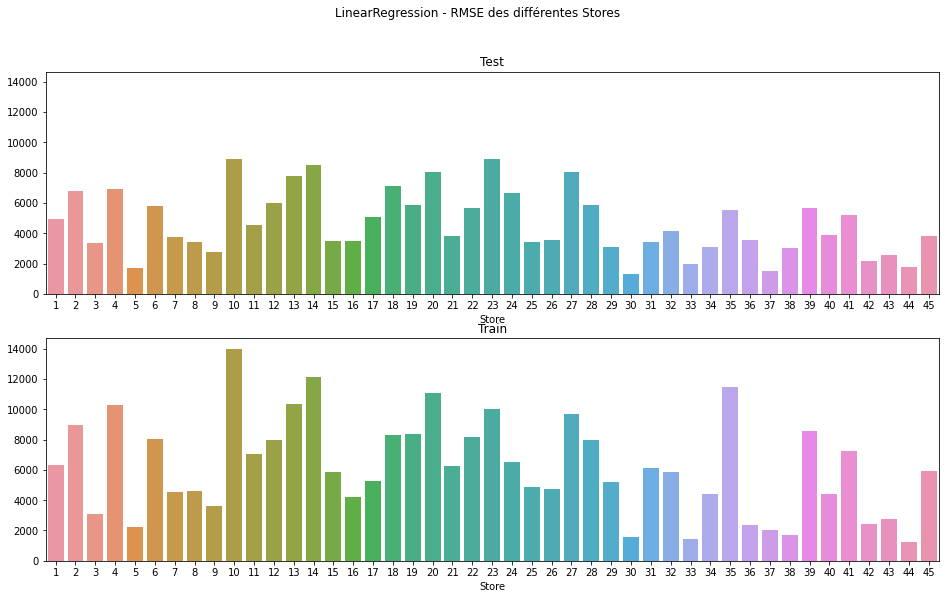

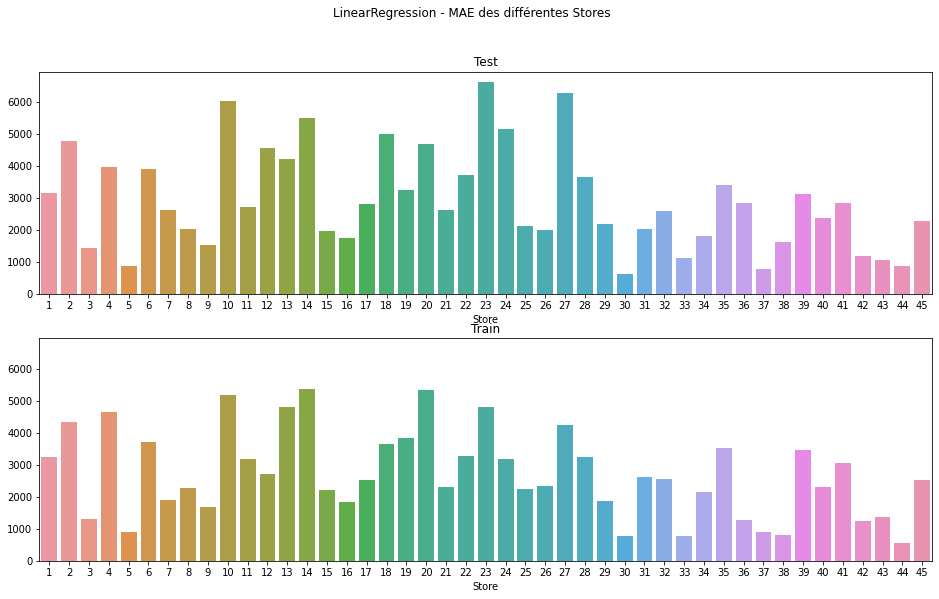

In [33]:
plot_metrics(metrics_lr, model_lr)

 ---- Features Importance


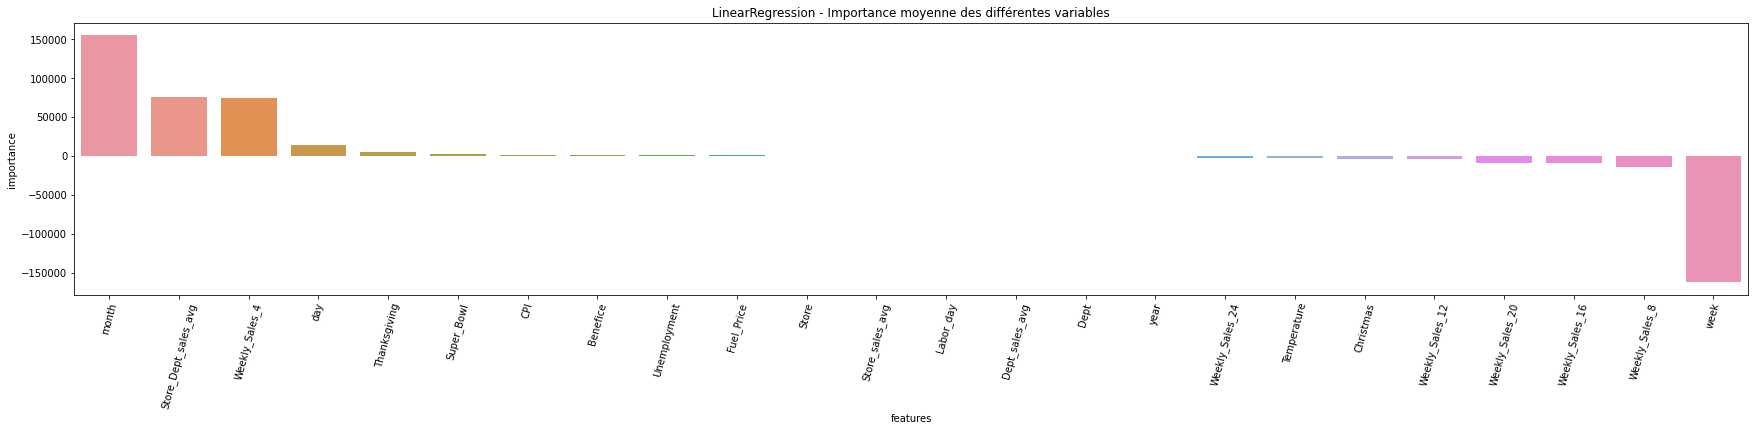

In [34]:
imp_plot(importance_df_lr, model_lr)

#### 1 - 1 - LGBMRegressor

In [35]:
from lightgbm import LGBMRegressor

model_lgbm, d_test_lgbm, d_train_lgbm, importance_df_lgbm, t2_lgbm = model(
  model = LGBMRegressor(
        n_estimators=100,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=8,
        num_leaves=50,
        min_child_weight=300
    )
)


Succès !
L'opération a duré 15.46 sec


 -------> RMSE
 <--> Train : 7618.26
 <--> Test  : 5340.49


 -------> MAE
 <--> Train : 2806.15
 <--> Test  : 2586.75


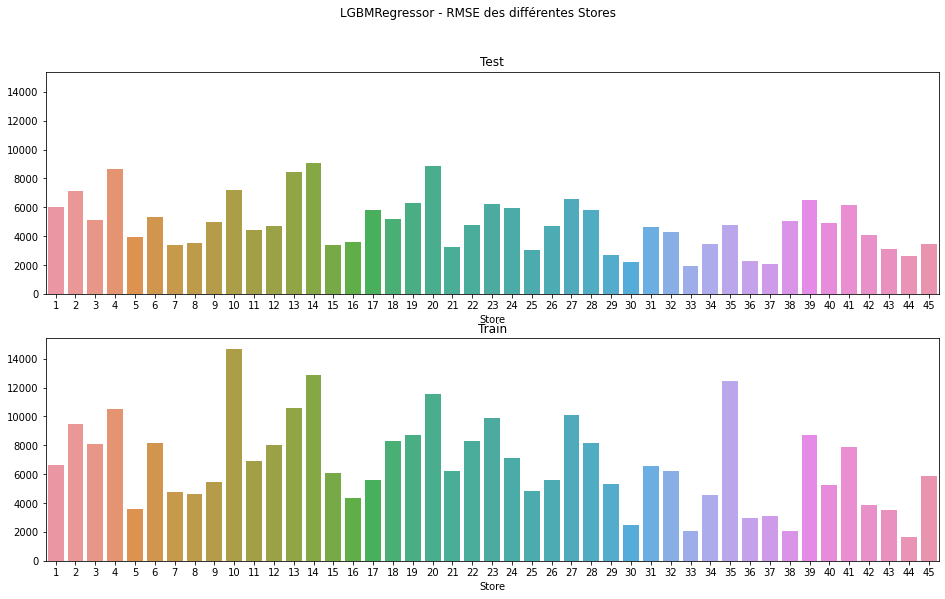

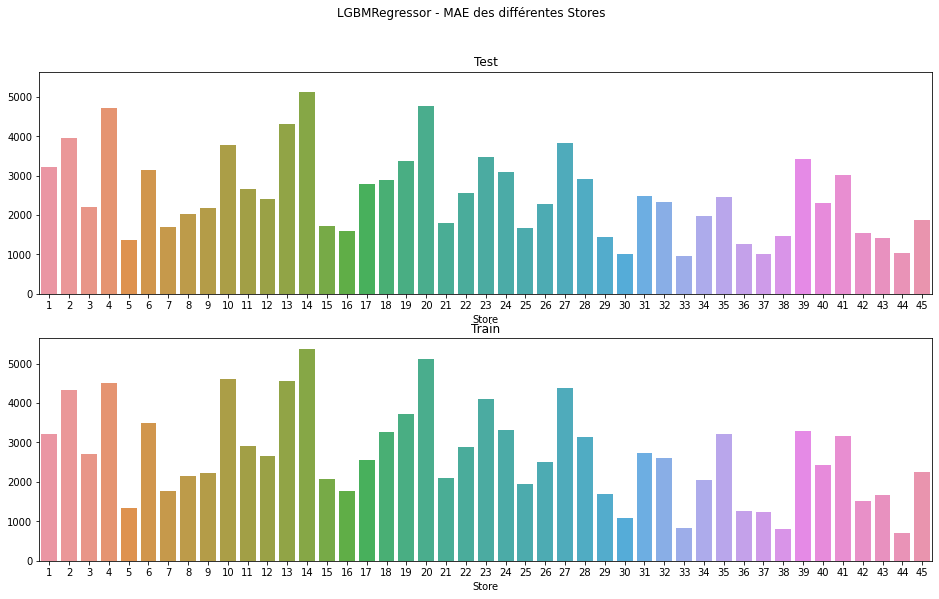

In [36]:
metrics_lgbm = metrics_(d_test_lgbm, d_train_lgbm)
plot_metrics(metrics_lgbm, model_lgbm)

 ---- Features Importance


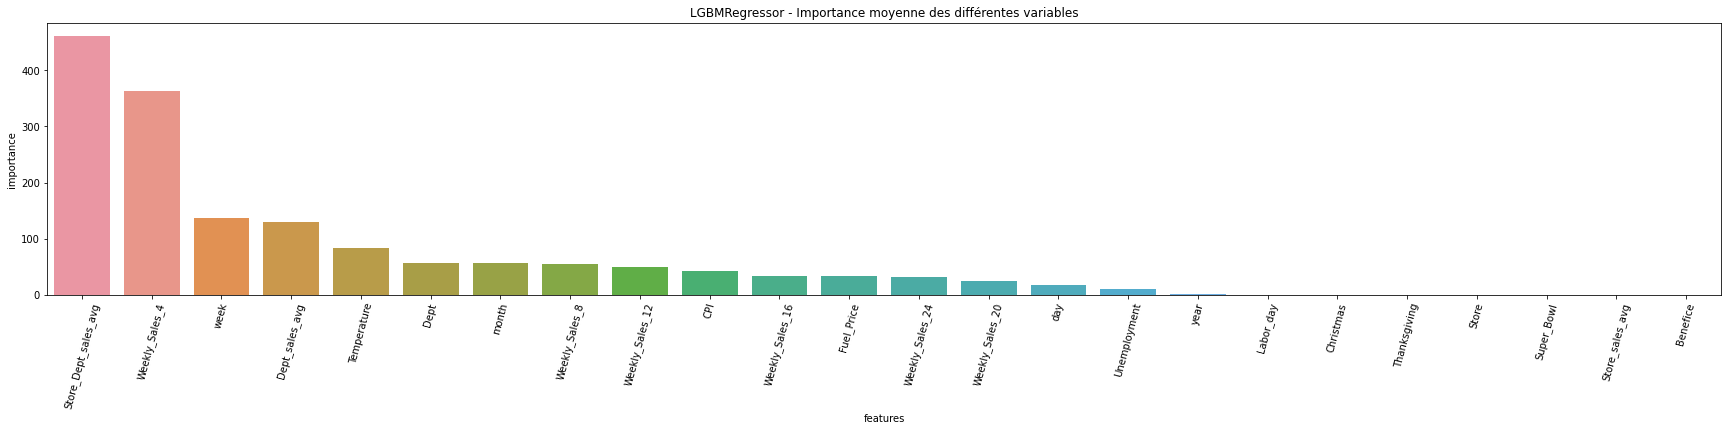

In [37]:
imp_plot(importance_df_lgbm, model_lgbm)

#### 1 - 2 - RandomForestRegressor


In [38]:
from sklearn.ensemble import RandomForestRegressor
model_rf, d_test_rf, d_train_rf,importance_df_rf, t2_rf = model(
  model = RandomForestRegressor())


Succès !
L'opération a duré 286.32 sec


 -------> RMSE
 <--> Train : 2056.92
 <--> Test  : 4091.67


 -------> MAE
 <--> Train : 680.65
 <--> Test  : 1944.68


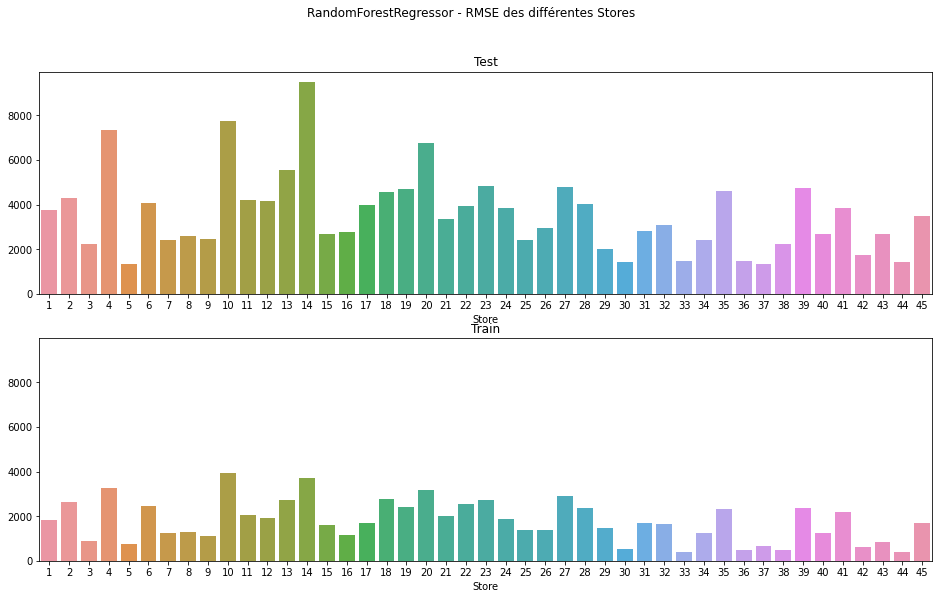

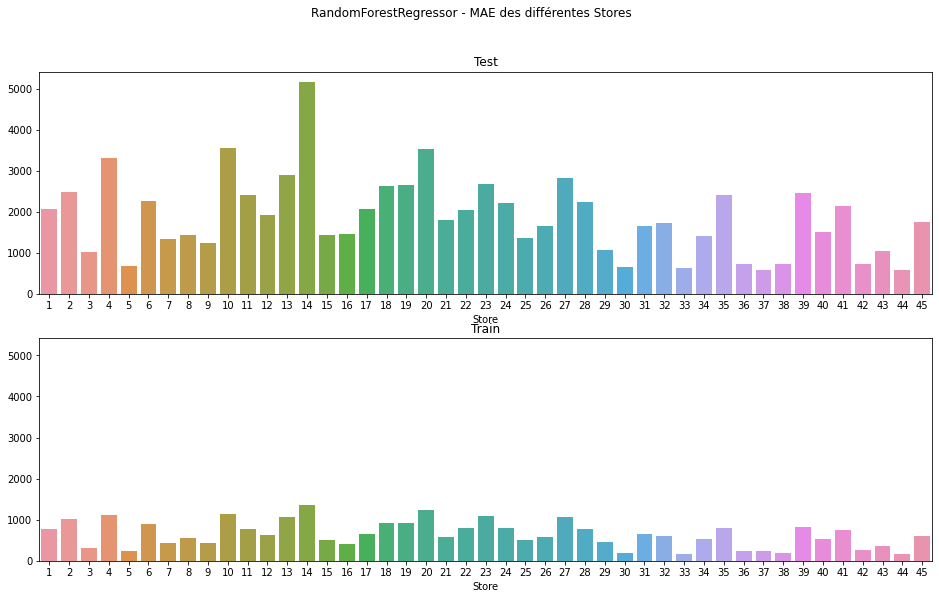

In [39]:
metrics_rf = metrics_(d_test_rf, d_train_rf)
plot_metrics(metrics_rf, model_rf)

 ---- Features Importance


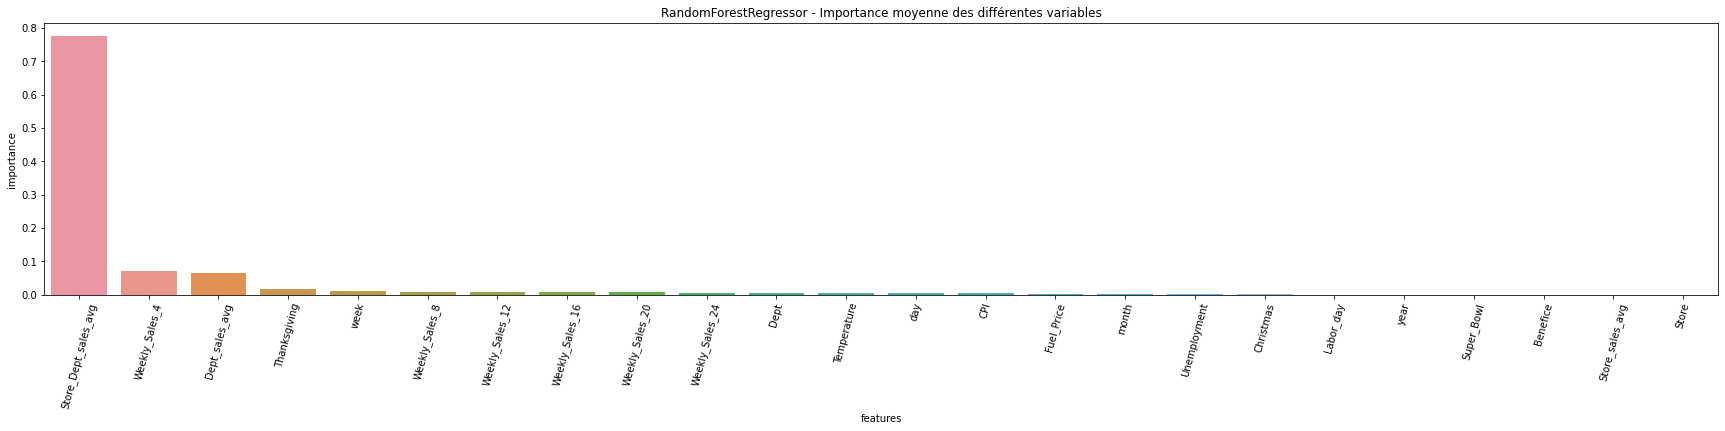

In [40]:
imp_plot(importance_df_rf, model_rf)

#### 1 - 3 - CatboostRegressor

In [41]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [42]:
import catboost
from catboost import CatBoostRegressor

model_ctb, d_test_ctb, d_train_ctb,importance_df_ctb, t2_ctb = model(
  model = CatBoostRegressor())


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6:	learn: 16658.1881232	total: 38.4ms	remaining: 5.45s
7:	learn: 15997.5887380	total: 42.3ms	remaining: 5.24s
8:	learn: 15382.2339181	total: 46.1ms	remaining: 5.08s
9:	learn: 14821.1247144	total: 50ms	remaining: 4.95s
10:	learn: 14296.6908913	total: 53.6ms	remaining: 4.82s
11:	learn: 13823.9157987	total: 57.4ms	remaining: 4.73s
12:	learn: 13345.3554531	total: 61.3ms	remaining: 4.65s
13:	learn: 12925.0577517	total: 65.2ms	remaining: 4.59s
14:	learn: 12515.4354447	total: 69.1ms	remaining: 4.54s
15:	learn: 12088.0356823	total: 73.1ms	remaining: 4.49s
16:	learn: 11699.2599044	total: 76.9ms	remaining: 4.45s
17:	learn: 11347.6025261	total: 80.7ms	remaining: 4.4s
18:	learn: 11037.3144087	total: 84.7ms	remaining: 4.37s
19:	learn: 10721.8253456	total: 88.5ms	remaining: 4.34s
20:	learn: 10408.9418535	total: 92.5ms	remaining: 4.31s
21:	learn: 10143.8424380	total: 96.3ms	remaining: 4.28s
22:	learn: 9900.9964181	total: 10

 -------> RMSE
 <--> Train : 1892.77
 <--> Test  : 3426.7


 -------> MAE
 <--> Train : 1099.99
 <--> Test  : 1732.89


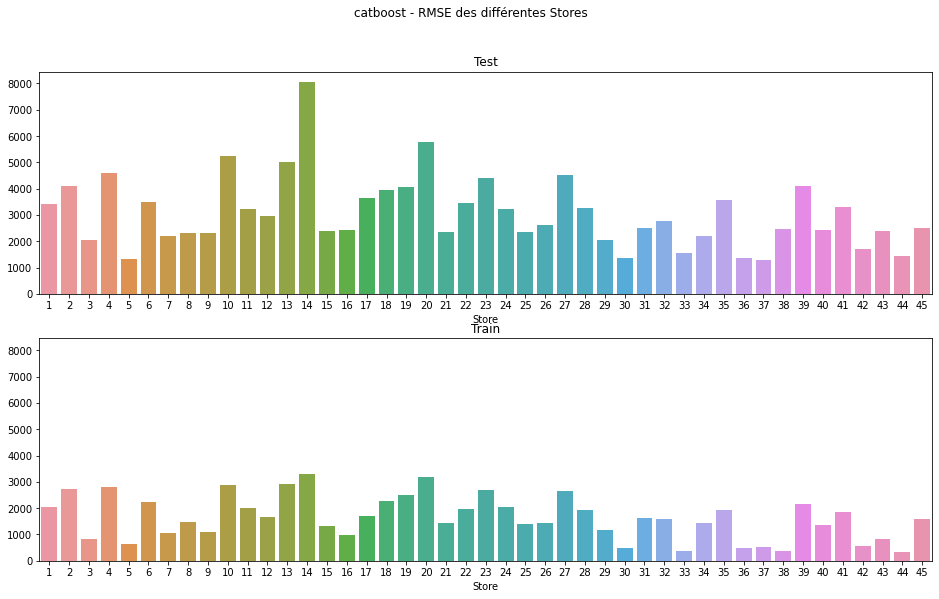

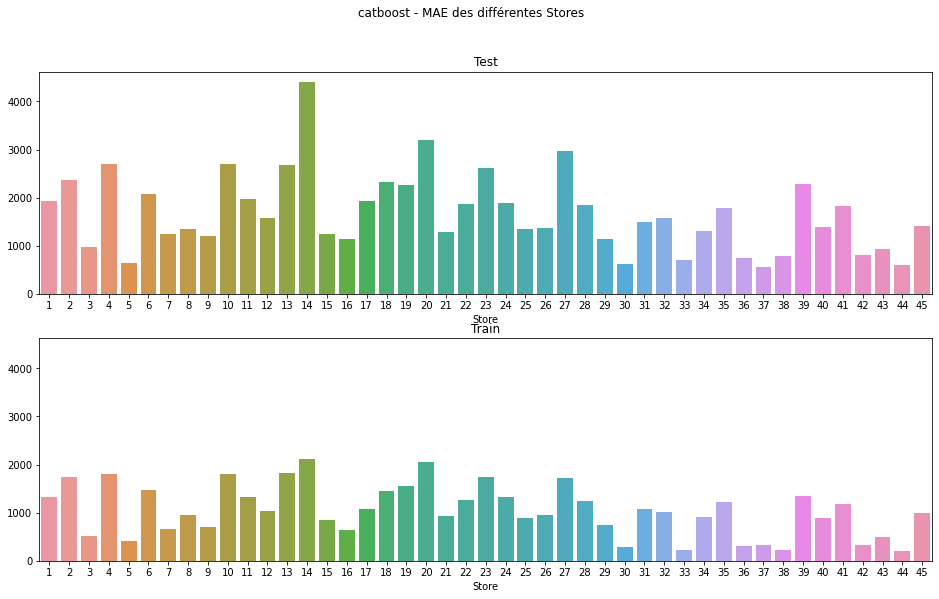

In [43]:
metrics_ctb = metrics_(d_test_ctb, d_train_ctb)
plot_metrics(metrics_ctb, model_ctb)

 ---- Features Importance


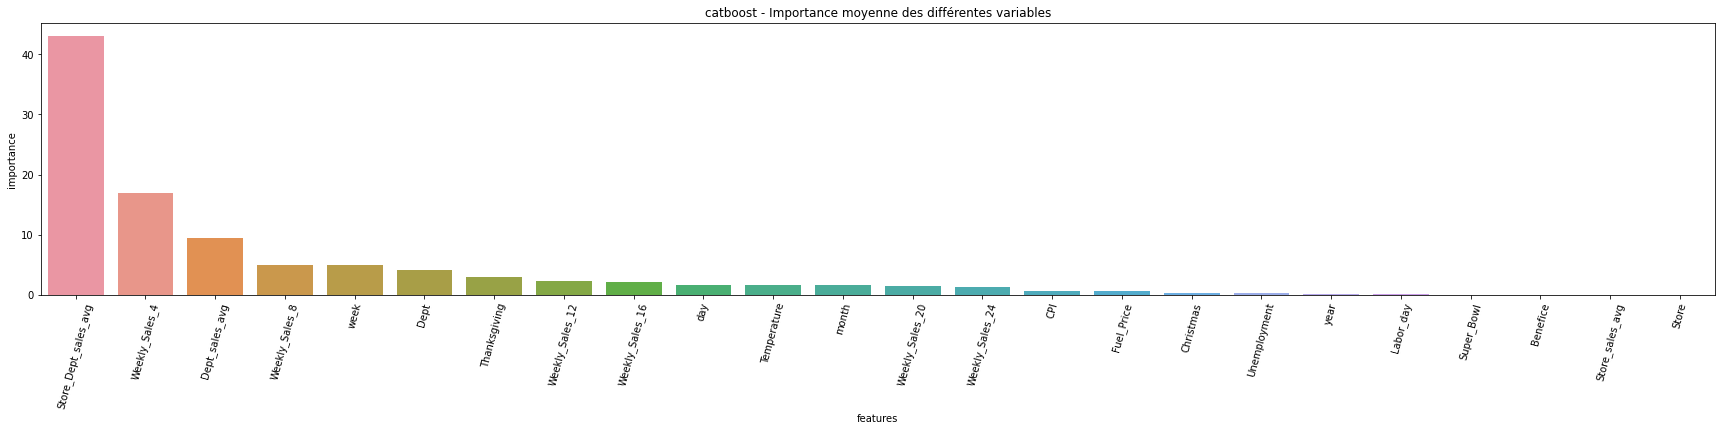

In [44]:
imp_plot(importance_df_ctb, model_ctb)

#### 1 - 4 - XgBoostRegressor

In [45]:
import xgboost
from xgboost import XGBRegressor 
model_xgb, d_test_xgb, d_train_xgb,importance_df_xgb, t2_xgb = model(
  model = XGBRegressor(objective="reg:squarederror"))

Succès !
L'opération a duré 53.6 sec


 -------> RMSE
 <--> Train : 4585.03
 <--> Test  : 4214.06


 -------> MAE
 <--> Train : 2067.6
 <--> Test  : 2084.48


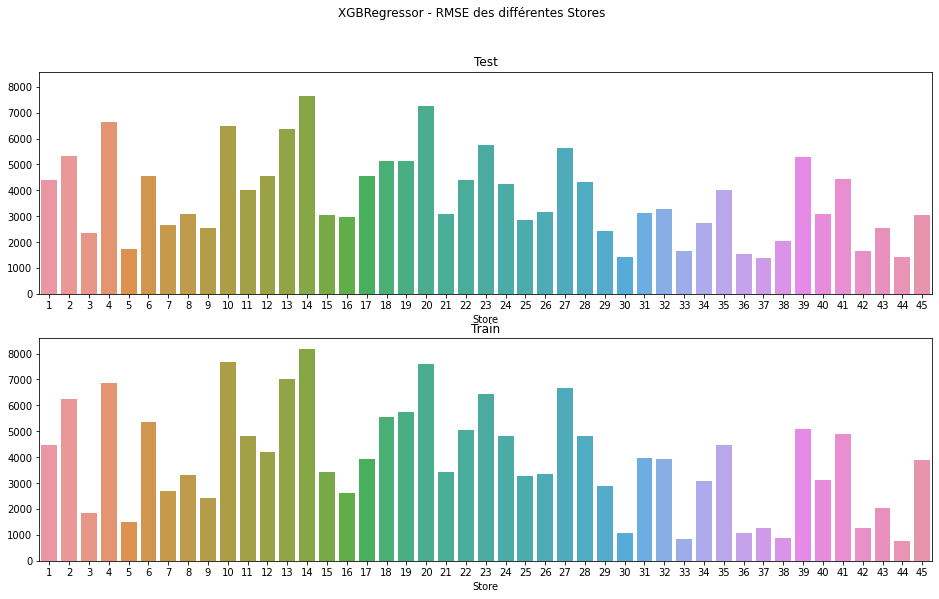

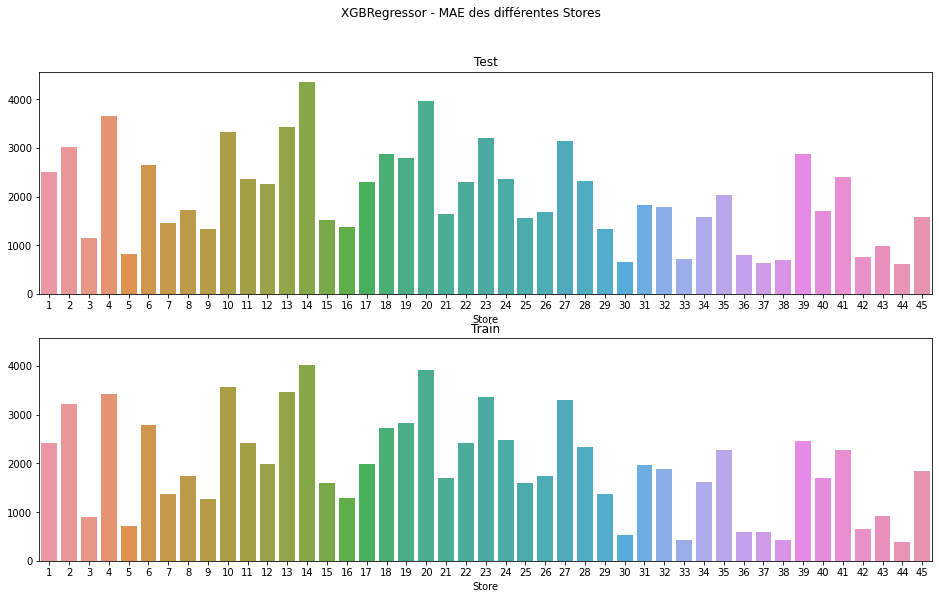

In [46]:
metrics_xgb = metrics_(d_test_xgb, d_train_xgb)
plot_metrics(metrics_xgb, model_xgb)

 ---- Features Importance


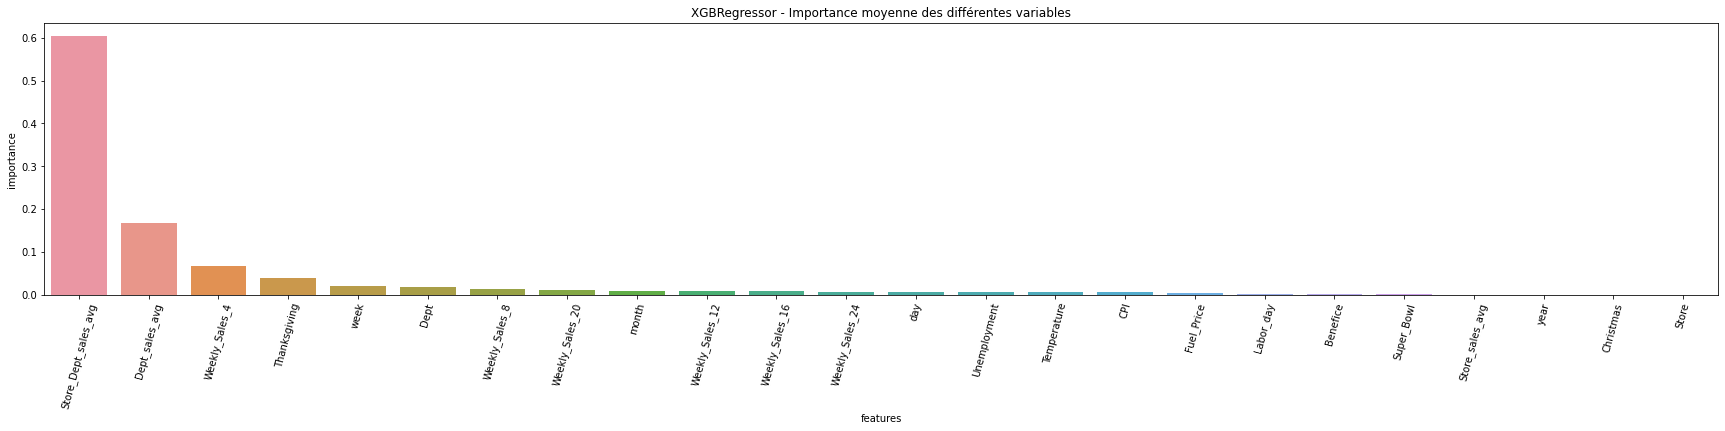

In [47]:
imp_plot(importance_df_xgb, model_xgb)

#### 1 - 5 - Perfs

In [48]:
pd.DataFrame(
    
    {"RMSE": [round(np.sqrt(mean_squared_error(d_test_lr["Weekly_Sales"], d_test_lr['y_pred_test'])),2),    round(np.sqrt(mean_squared_error(d_test_lgbm["Weekly_Sales"], d_test_lgbm['y_pred_test'])),2),
              round(np.sqrt(mean_squared_error(d_test_rf["Weekly_Sales"], d_test_rf['y_pred_test'])),2),    round(np.sqrt(mean_squared_error(d_test_ctb["Weekly_Sales"], d_test_ctb['y_pred_test'])),2),
              round(np.sqrt(mean_squared_error(d_test_xgb["Weekly_Sales"], d_test_xgb['y_pred_test'])),2)], 
    
     "MAE" : [round(mean_absolute_error(d_test_lr["Weekly_Sales"], d_test_lr['y_pred_test']),2),            round(mean_absolute_error(d_test_lgbm["Weekly_Sales"], d_test_lgbm['y_pred_test']),2),
              round(mean_absolute_error(d_test_rf["Weekly_Sales"], d_test_rf['y_pred_test']),2),            round(mean_absolute_error(d_test_ctb["Weekly_Sales"], d_test_ctb['y_pred_test']),2),
              round(mean_absolute_error(d_test_xgb["Weekly_Sales"], d_test_xgb['y_pred_test']),2)],

"RMSE_PCT" :[round(100 * np.sqrt(np.mean((d_test_lr["Weekly_Sales"] - d_test_lr["y_pred_test"]) ** 2))/np.mean(d_test_lr["y_pred_test"]), 2),
             round(100 * np.sqrt(np.mean((d_test_lgbm["Weekly_Sales"] - d_test_lgbm["y_pred_test"]) ** 2))/np.mean(d_test_lgbm["y_pred_test"]), 2),
             round(100 * np.sqrt(np.mean((d_test_rf["Weekly_Sales"] - d_test_rf["y_pred_test"]) ** 2))/np.mean(d_test_rf["y_pred_test"]), 2),
             round(100 * np.sqrt(np.mean((d_test_ctb["Weekly_Sales"] - d_test_ctb["y_pred_test"]) ** 2))/np.mean(d_test_ctb["y_pred_test"]), 2),
             round(100 * np.sqrt(np.mean((d_test_xgb["Weekly_Sales"] - d_test_xgb["y_pred_test"]) ** 2))/np.mean(d_test_xgb["y_pred_test"]), 2)],
     

     "TEMPS(sec)" : [t2_lr, t2_lgbm, t2_rf, t2_ctb, t2_xgb]},
    index=["LinearRegression", "LightGBM", "RandomForest", "CatBoost","XgBoost"]
)

,RMSE,MAE,RMSE_PCT,TEMPS(sec)
LinearRegression,5251.66,3033.24,35.92,6.671149
LightGBM,5340.49,2586.75,33.96,15.458557
RandomForest,4091.67,1944.68,25.02,286.319805
CatBoost,3426.70,1732.89,21.76,262.286309
XgBoost,4214.06,2084.48,27.18,53.602582


### 7 - 2 - Méthodes Classiques

# 8 - Evaluation de la performance des modèles (recherche d'hyperparamètres, contrôle de l’overfitting, comparaison des performances) sur différents horizons de prédiction

In [49]:
from sklearn.linear_model import Ridge, Lasso, LassoLarsIC, ElasticNet

In [50]:
def reg_pen(estimateur):

  a = pd.DataFrame()
        # POUR ÉVITER DE DIVISER PAR 0 EN FAISANT LE np.log10
  EPSILON = 1e-4
  importance_df = pd.DataFrame()
  

  d_test = pd.DataFrame()
  d_train = pd.DataFrame()
  stores = df.Store.unique()
  for store in stores:

    df_ = df[df['Store']==store]

    train = df_.loc[:'2011-12-30']
    #train = df_.loc[:'2010-05-31']

    scaler = MinMaxScaler()
    X_train = train.drop("Weekly_Sales", axis = 1)
    X_train_ = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_, columns = X_train.columns)

    y_train = train["Weekly_Sales"]

    # Validation Prediction
    test = df_.loc['2012-01-06':]
    #test = df_.loc['2010-06-01':]

    test_ = test.copy()

    X_test = test.drop("Weekly_Sales", axis = 1)
    X_test_ = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_, columns = X_test.columns)
    y_test = test["Weekly_Sales"]
    X_test = X_test.set_index(y_test.index)
    y_test = test["Weekly_Sales"]

      # Train and validate
    model = estimateur
    xxx, yyy = X_train, y_train
    model.fit(xxx, yyy)
    a["R2_Store_"+str(store)] = model.score(xxx, yyy)

    a["features"] = [ col for col in xxx.columns if col != "Weekly_Sales"]
    a["coefs_"+str(store)] = model.coef_
  
  a["coefs"]  = np.mean(a[[col for col in a.columns if col.startswith("coefs")]], axis = 1)
  a["R2"]     = np.mean(a[[col for col in a.columns if col.startswith("R2")]], axis = 1)

  a = a[["features", "coefs", "R2"]]
  a = a.sort_values(by = "coefs", ascending = True)
  print("Le", model, "a sélectionné " + str(a[a["coefs"]!=0].shape[0]) + " variables et en a éliminé " +  str(a[a["coefs"]==0].shape[0]))
  print("R2 : "+str(round(np.mean(a['R2']), 2)))
  vars = list(a[a["coefs"]!=0]["features"])
  print("Les variables sélectionnées sont : \n"+ str(vars))
  print("Les variables supprimées sont : \n"+ str(list(a[a["coefs"]==0]["features"])))
  return a


In [51]:
ridge = reg_pen(Ridge())

Le Ridge() a sélectionné 22 variables et en a éliminé 2
R2 : 0.89
Les variables sélectionnées sont : 
['Weekly_Sales_20', 'Weekly_Sales_16', 'Weekly_Sales_8', 'Weekly_Sales_12', 'Christmas', 'Weekly_Sales_24', 'Temperature', 'year', 'Labor_day', 'Dept', 'day', 'week', 'Unemployment', 'CPI', 'Benefice', 'Fuel_Price', 'Super_Bowl', 'Dept_sales_avg', 'month', 'Thanksgiving', 'Weekly_Sales_4', 'Store_Dept_sales_avg']
Les variables supprimées sont : 
['Store_sales_avg', 'Store']


In [52]:
lasso = reg_pen(Lasso())

Le Lasso() a sélectionné 22 variables et en a éliminé 2
R2 : 0.89
Les variables sélectionnées sont : 
['Weekly_Sales_8', 'Weekly_Sales_16', 'Weekly_Sales_20', 'Weekly_Sales_12', 'Christmas', 'Weekly_Sales_24', 'Temperature', 'year', 'Labor_day', 'Dept', 'day', 'week', 'Dept_sales_avg', 'Unemployment', 'CPI', 'Benefice', 'Fuel_Price', 'Super_Bowl', 'month', 'Thanksgiving', 'Weekly_Sales_4', 'Store_Dept_sales_avg']
Les variables supprimées sont : 
['Store_sales_avg', 'Store']


In [53]:
elnet = reg_pen(ElasticNet())

Le ElasticNet() a sélectionné 22 variables et en a éliminé 2
R2 : 0.32
Les variables sélectionnées sont : 
['Temperature', 'year', 'Christmas', 'Unemployment', 'Fuel_Price', 'day', 'Labor_day', 'Super_Bowl', 'Benefice', 'CPI', 'Thanksgiving', 'week', 'month', 'Dept', 'Weekly_Sales_24', 'Weekly_Sales_20', 'Weekly_Sales_16', 'Weekly_Sales_12', 'Weekly_Sales_8', 'Weekly_Sales_4', 'Dept_sales_avg', 'Store_Dept_sales_avg']
Les variables supprimées sont : 
['Store', 'Store_sales_avg']


In [54]:
lslars = reg_pen(LassoLarsIC())

Le LassoLarsIC() a sélectionné 22 variables et en a éliminé 2
R2 : 0.89
Les variables sélectionnées sont : 
['week', 'Weekly_Sales_8', 'Weekly_Sales_16', 'Weekly_Sales_20', 'Weekly_Sales_12', 'Christmas', 'Temperature', 'Weekly_Sales_24', 'year', 'Dept', 'Dept_sales_avg', 'Labor_day', 'Fuel_Price', 'Unemployment', 'Benefice', 'CPI', 'Super_Bowl', 'Thanksgiving', 'day', 'Weekly_Sales_4', 'Store_Dept_sales_avg', 'month']
Les variables supprimées sont : 
['Store_sales_avg', 'Store']


On remarque que les variables supprimées ne sont que de 2, on peut alors ne pas considérer les regressions pénalisées.

# 9 - Expanding Windows

On va faire des expanding windows de 6 mois chaque fois

In [55]:
[
 df[(df["year"]==2010) & (df["month"]==2)].index[0], df[(df["year"]==2010) & (df["month"]==6)].index[-1], df[(df["year"]==2010) & (df["month"]==7)].index[0], df[(df["year"]==2010) & (df["month"]==12)].index[-1], 
 
 df[(df["year"]==2011) & (df["month"]==1)].index[0], df[(df["year"]==2011) & (df["month"]==6)].index[-1], df[(df["year"]==2011) & (df["month"]==7)].index[0], df[(df["year"]==2011) & (df["month"]==12)].index[-1], 
 
 df[(df["year"]==2012) & (df["month"]==1)].index[0], df[(df["year"]==2012) & (df["month"]==6)].index[-1], df[(df["year"]==2012) & (df["month"]==7)].index[0], df[(df["year"]==2012) & (df["month"]==10)].index[-1], 
 
 ]

[Timestamp('2010-02-05 00:00:00'),
 Timestamp('2010-06-25 00:00:00'),
 Timestamp('2010-07-02 00:00:00'),
 Timestamp('2010-12-31 00:00:00'),
 Timestamp('2011-01-07 00:00:00'),
 Timestamp('2011-06-24 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-12-30 00:00:00'),
 Timestamp('2012-01-06 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2012-07-06 00:00:00'),
 Timestamp('2012-10-26 00:00:00')]

In [56]:

train_1 = df.loc['2010-02-05':'2010-12-31'] # 1 an (année 2010)
test_1  = df.loc['2011-01-07':'2011-06-24'] # 6 mois (Janv à Juin 2011)

train_2 = df.loc['2010-02-05':'2011-06-24'] # 1 an et 6 mois (Debut 2010 à Juin 2011)
test_2  = df.loc['2011-07-01':'2011-12-30'] # 6 mois (Juillet à Décembre 2011)

train_3 = df.loc['2010-02-05':'2011-12-30'] # 2 ans (Début 2010 à Fin 2011)
test_3  = df.loc['2012-01-06':'2012-06-29'] # 6 mois (Janv à Juin 2012)

train_4 = df.loc['2010-02-05':'2012-06-29'] # 2 ans et 6 mois (Début 2010 à Juin 2012)
test_4  = df.loc['2012-07-06':'2012-10-26'] # 6 mois (Juillet 2012 à Déc 2012)

#### 9 - 0 - Fn

In [57]:
def metrics_np(predictions_test, predictions_train):

  metrics_dict = {"Store" : [], "RMSE_train" : [], "RMSE_test" : [], "MAE_train" : [], 
                                "MAE_test" : [],"RMSE_PCT_train": [], "RMSE_PCT_test": []}

  for store in predictions_train["Store"].unique():

    m_test = predictions_test[predictions_test["Store"]==store]
    rmse = np.sqrt(mean_squared_error(m_test["Weekly_Sales"], m_test["y_pred_test"]))
    mae = mean_absolute_error(m_test["Weekly_Sales"], m_test["y_pred_test"])
    rmse_pct = 100 * np.sqrt(np.mean((m_test["Weekly_Sales"] - m_test["y_pred_test"]) ** 2))/np.mean(m_test["y_pred_test"])

    m_train = predictions_train[predictions_train["Store"]==store]
    rmse_train = np.sqrt(mean_squared_error(m_train["Weekly_Sales"], m_train["y_pred_train"]))
    mae_train = mean_absolute_error(m_train["Weekly_Sales"], m_train["y_pred_train"])
    rmse_pct_train = 100 * np.sqrt(np.mean((m_train["Weekly_Sales"] - m_train["y_pred_train"]) ** 2))/np.mean(m_train["y_pred_train"])

    metrics_dict["Store"].append(store)

    metrics_dict["RMSE_train"].append(rmse_train)
    metrics_dict["RMSE_test"].append(rmse)

    metrics_dict["MAE_train"].append(mae_train) 
    metrics_dict["MAE_test"].append(mae)

    metrics_dict["RMSE_PCT_train"].append(rmse_pct_train)
    metrics_dict["RMSE_PCT_test"].append(rmse_pct)

  metrics = pd.DataFrame(metrics_dict)
  """  
  print(" -------> RMSE")
  print(" <--> Train : "+str(round(np.sqrt(mean_squared_error(predictions_train["Weekly_Sales"], predictions_train['y_pred_train'])),2)))
  print(" <--> Test  : "+str(round(np.sqrt(mean_squared_error(predictions_test["Weekly_Sales"], predictions_test['y_pred_test'])),2)))
  print("\n")
  print(" -------> MAE")
  print(" <--> Train : "+str(round(mean_absolute_error(predictions_train["Weekly_Sales"], predictions_train['y_pred_train']),2)))
  print(" <--> Test  : "+str(round(mean_absolute_error(predictions_test["Weekly_Sales"], predictions_test['y_pred_test']),2)))
  """
  return metrics


In [58]:
def exp_win(model, exp_window):

  #print("--> Expanding window : ", exp_window, "<--")

  importance_df = pd.DataFrame()
  stores = df.Store.unique()
  d_test = pd.DataFrame()
  d_train = pd.DataFrame()
  metrics = {}


  t1 = time.time()
  for store in stores:

    df_ = df[df['Store']==store]

    if exp_window == 1:
      train = df_.loc['2010-02-05':'2010-12-31'] # 1 an
      test  = df_.loc['2011-01-07':'2011-06-24'] # 6 mois
    elif exp_window == 2:
      train = df_.loc['2010-02-05':'2011-06-24'] # 1 an et 6 mois
      test  = df_.loc['2011-07-01':'2011-12-30'] # 6 mois
    elif exp_window == 3:
      train = df_.loc['2010-02-05':'2011-12-30'] # 2 ans
      test  = df_.loc['2012-01-06':'2012-06-29'] # 6 mois
    elif exp_window == 4:
      train = df_.loc['2010-02-05':'2012-06-29'] # 2 ans et 6 mois
      test  = df_.loc['2012-07-06':'2012-10-26'] # 6 mois

    #train = df_.loc[:'2011-12-30']
    #train = df_.loc[:'2010-05-31']

    scaler = MinMaxScaler()
    X_train = train.drop("Weekly_Sales", axis = 1)
    X_train_ = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_, columns = X_train.columns)

    y_train = train["Weekly_Sales"]

    # Validation Prediction
    #test = df_.loc['2012-01-06':]
    #test = df_.loc['2010-06-01':]

    X_test = test.drop("Weekly_Sales", axis = 1)
    X_test_ = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_, columns = X_test.columns)
    y_test = test["Weekly_Sales"]

    X_test = X_test.set_index(y_test.index)
    y_test = test["Weekly_Sales"]

      # Train and validate
    model = model

    # Fit model
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    pred = pd.DataFrame(test_pred)
    pred = pred.set_index(y_test.index)
    predictions_test = pd.concat([y_test, pred], axis = 1)
    predictions_test.columns = ["Weekly_Sales", "y_pred_test"]
    predictions_test["Store"] = store
    #predictions_test["erreur_test"] = predictions_test["Weekly_Sales"] - predictions_test["y_pred_test"]

    test_pred_train = model.predict(X_train)
    pred_train = pd.DataFrame(test_pred_train)
    pred_train = pred_train.set_index(y_train.index)
    predictions_train = pd.concat([y_train, pred_train], axis = 1)
    predictions_train.columns = ["Weekly_Sales", "y_pred_train"]
    predictions_train["Store"] = store
    #predictions_train["erreur_train"] = predictions_train["Weekly_Sales"] - predictions_train["y_pred_train"]

    d_test = pd.concat([d_test, predictions_test], axis = 0)
    d_train = pd.concat([d_train, predictions_train], axis = 0)

    importance_df["features"] = [ col for col in X_train.columns if col != "Weekly_Sales"]
    importance_df["importance_"+str(store)] = model.feature_importances_
  
  importance_df["importance"] = np.mean(importance_df[[col for col in importance_df.columns if col!= "features"]], axis = 1)
  importance_df = importance_df[["features", "importance"]]

  t2 = time.time() - t1

  #assert d_test.shape[0]  == df[df['year']== 2012].shape[0]
  #assert d_train.shape[0] == df[df['year']== 2010].shape[0] + df[df['year']==2011].shape[0]

  #print('Model is calculating the metrics !')
  metrics = metrics_np(d_test, d_train)
  t2 = time.time() - t1
  #print("Succès !")
  #print("L'opération a duré "+str(round(t2, 2))+" sec")
  #print("\n")
  
  return t2, model, exp_window, d_test, d_train

#### 9 - 1 - XGBRegressor

In [59]:
a =  {"RMSE"      : [], 
     "MAE"        : [],
     "RMSE_PCT"   : [],
     "WIND"       : [],
     "MODEL"      : [],
     "TEMPS(sec)" : []}

for i in range(1,5):
  t2, model, exp_window, d_test, d_train = exp_win(XGBRegressor(objective='reg:squarederror'), i)
  a["RMSE"].append(round(np.sqrt(mean_squared_error(d_test["Weekly_Sales"], d_test['y_pred_test'])),2))
  a["MAE"].append(round(mean_absolute_error(d_test["Weekly_Sales"], d_test['y_pred_test']),2))
  a["RMSE_PCT"].append(round(100*np.sqrt(np.mean((d_test["Weekly_Sales"] - d_test["y_pred_test"]) ** 2))/np.mean(d_test["y_pred_test"]),2))
  a["WIND"].append(exp_window)
  a["MODEL"].append(str(re.findall(r"\w+", str(model))[0]))
  a["TEMPS(sec)"].append(round(t2,2))

In [60]:
xgb = pd.DataFrame(a)


In [61]:
xgb.head()

,RMSE,MAE,RMSE_PCT,WIND,MODEL,TEMPS(sec)
0,11668.40,3734.71,69.65,1,XGBRegressor,22.56
1,6727.08,2742.29,40.18,2,XGBRegressor,31.39
2,4316.40,2119.66,28.03,3,XGBRegressor,46.17
3,3803.66,1895.20,23.98,4,XGBRegressor,57.13


#### 9 - 2 - LGBMRegressor

In [62]:
b =  {"RMSE"      : [], 
     "MAE"        : [],
     "RMSE_PCT"   : [],
     "WIND"       : [],
     "MODEL"      : [],
     "TEMPS(sec)" : []}

for i in range(1,5):
  t2, model, exp_window, d_test, d_train = exp_win(LGBMRegressor(), i)
  b["RMSE"].append(round(np.sqrt(mean_squared_error(d_test["Weekly_Sales"], d_test['y_pred_test'])),2))
  b["MAE"].append(round(mean_absolute_error(d_test["Weekly_Sales"], d_test['y_pred_test']),2))
  b["RMSE_PCT"].append(round(100*np.sqrt(np.mean((d_test["Weekly_Sales"] - d_test["y_pred_test"]) ** 2))/np.mean(d_test["y_pred_test"]),2))
  b["WIND"].append(exp_window)
  b["MODEL"].append(str(re.findall(r"\w+", str(model))[0]))
  b["TEMPS(sec)"].append(round(t2,2))

In [63]:
lgbm = pd.DataFrame(b)

In [64]:
lgbm.head()

,RMSE,MAE,RMSE_PCT,WIND,MODEL,TEMPS(sec)
0,9110.08,3993.27,54.54,1,LGBMRegressor,15.40
1,6804.27,2483.83,40.81,2,LGBMRegressor,20.68
2,3797.92,1872.66,24.55,3,LGBMRegressor,19.14
3,3281.19,1647.47,20.77,4,LGBMRegressor,15.65


#### 9 - 3 - CatBoostRegressor

In [ ]:
d =  {"RMSE"      : [], 
      "MAE"       : [],
     "RMSE_PCT"   : [],
     "WIND"       : [],
     "MODEL"      : [],
     "TEMPS(sec)" : []}

for i in range(1,5):
  t2, model, exp_window, d_test, d_train = exp_win(CatBoostRegressor(), i)
  d["RMSE"].append(round(np.sqrt(mean_squared_error(d_test["Weekly_Sales"], d_test['y_pred_test'])),2))
  d["MAE"].append(round(mean_absolute_error(d_test["Weekly_Sales"], d_test['y_pred_test']),2))
  d["RMSE_PCT"].append(round(100*np.sqrt(np.mean((d_test["Weekly_Sales"] - d_test["y_pred_test"]) ** 2))/np.mean(d_test["y_pred_test"]),2))
  d["WIND"].append(exp_window)
  d["MODEL"].append(str(re.findall(r"\w+", str(model))[0]))
  d["TEMPS(sec)"].append(round(t2,2))

In [66]:
ctb = pd.DataFrame(d)

In [ ]:
ctb

#### 9 - 4 - RandomForestRegressor

In [67]:
c =  {"RMSE"      : [], 
     "MAE"        : [],
     "RMSE_PCT"   : [],
     "WIND"       : [],
     "MODEL"      : [],
     "TEMPS(sec)" : []}

for i in range(1,5):
  t2, model, exp_window, d_test, d_train = exp_win(RandomForestRegressor(), i)
  c["RMSE"].append(round(np.sqrt(mean_squared_error(d_test["Weekly_Sales"], d_test['y_pred_test'])),2))
  c["MAE"].append(round(mean_absolute_error(d_test["Weekly_Sales"], d_test['y_pred_test']),2))
  c["RMSE_PCT"].append(round(100*np.sqrt(np.mean((d_test["Weekly_Sales"] - d_test["y_pred_test"]) ** 2))/np.mean(d_test["y_pred_test"]),2))
  c["WIND"].append(exp_window)
  c["MODEL"].append(str(re.findall(r"\w+", str(model))[0]))
  c["TEMPS(sec)"].append(round(t2,2))

In [68]:
rf = pd.DataFrame(c)

In [69]:
rf.head()

,RMSE,MAE,RMSE_PCT,WIND,MODEL,TEMPS(sec)
0,9016.45,3598.15,50.29,1,RandomForestRegressor,115.06
1,5794.33,2269.52,35.04,2,RandomForestRegressor,215.27
2,4150.30,1965.43,25.44,3,RandomForestRegressor,288.83
3,3232.70,1566.25,20.26,4,RandomForestRegressor,376.02


In [70]:
performances = pd.concat([rf, xgb, lgbm, ctb], axis = 0)

In [75]:
perf_per_rmse = performances.sort_values(by = "RMSE", ascending = True)

perf_per_rmse.head(20)

,RMSE,MAE,RMSE_PCT,WIND,MODEL,TEMPS(sec)
3,2962.71,1526.08,18.80,4,catboost,239.97
3,3232.70,1566.25,20.26,4,RandomForestRegressor,376.02
3,3281.19,1647.47,20.77,4,LGBMRegressor,15.65
2,3476.74,1758.12,22.16,3,catboost,205.94
2,3797.92,1872.66,24.55,3,LGBMRegressor,19.14
3,3803.66,1895.20,23.98,4,XGBRegressor,57.13
2,4150.30,1965.43,25.44,3,RandomForestRegressor,288.83
2,4316.40,2119.66,28.03,3,XGBRegressor,46.17
1,5471.69,2242.74,33.21,2,catboost,248.83
1,5794.33,2269.52,35.04,2,RandomForestRegressor,215.27


In [78]:
perf_per_mae = performances.sort_values(by = ["MAE"], ascending = True)

perf_per_mae.head(20)

,RMSE,MAE,RMSE_PCT,WIND,MODEL,TEMPS(sec)
3,2962.71,1526.08,18.80,4,catboost,239.97
3,3232.70,1566.25,20.26,4,RandomForestRegressor,376.02
3,3281.19,1647.47,20.77,4,LGBMRegressor,15.65
2,3476.74,1758.12,22.16,3,catboost,205.94
2,3797.92,1872.66,24.55,3,LGBMRegressor,19.14
3,3803.66,1895.20,23.98,4,XGBRegressor,57.13
2,4150.30,1965.43,25.44,3,RandomForestRegressor,288.83
2,4316.40,2119.66,28.03,3,XGBRegressor,46.17
1,5471.69,2242.74,33.21,2,catboost,248.83
1,5794.33,2269.52,35.04,2,RandomForestRegressor,215.27


#### 9 - 5 - Méthodes classiques

# 10 - Discussion autour de la performance des modèles

# 10 - Synthèse et conclusions, pistes d’améliorations envisagées